In [1]:
using DataFrames, MLJ, CairoMakie

In [2]:
X, y = @load_boston;
X = DataFrame(X)
y = Vector(y);

In [3]:
print([(m.name, m.package_name) for m in models(matching(X,y)) if m.is_pure_julia == true])

[("ConstantRegressor", "MLJModels"), ("DecisionTreeRegressor", "BetaML"), ("DecisionTreeRegressor", "DecisionTree"), ("DeterministicConstantRegressor", "MLJModels"), ("ElasticNetRegressor", "MLJLinearModels"), ("EvoTreeGaussian", "EvoTrees"), ("EvoTreeRegressor", "EvoTrees"), ("HuberRegressor", "MLJLinearModels"), ("KNNRegressor", "NearestNeighborModels"), ("KPLSRegressor", "PartialLeastSquaresRegressor"), ("LADRegressor", "MLJLinearModels"), ("LassoRegressor", "MLJLinearModels"), ("LinearRegressor", "GLM"), ("LinearRegressor", "MLJLinearModels"), ("LinearRegressor", "MultivariateStats"), ("NeuralNetworkRegressor", "MLJFlux"), ("PLSRegressor", "PartialLeastSquaresRegressor"), ("QuantileRegressor", "MLJLinearModels"), ("RandomForestRegressor", "BetaML"), ("RandomForestRegressor", "DecisionTree"), ("RidgeRegressor", "MLJLinearModels"), ("RidgeRegressor", "MultivariateStats"), ("RobustRegressor", "MLJLinearModels")]

In [4]:
model = @load LassoRegressor pkg=MLJLinearModels
pipe = @pipeline Standardizer model

import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\loading.jl:168


Pipeline276(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    lasso_regressor = LassoRegressor(
            lambda = 1.0,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing))

In [13]:
r = range(pipe, :(lasso_regressor.lambda), lower=1, upper=100)
tuned_model = TunedModel(model=pipe,
                         tuning=Grid(resolution=50),
                         resampling=CV(),
                         range=r,
                         measure=rms)
m = machine(tuned_model, X, y) |> fit!

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Attempting to evaluate 50 models.
└ @ MLJTuning C:\Users\jnovoa\.julia\packages\MLJTuning\bjRHJ\src\tuned_models.jl:680
Evaluating over 50 metamodels:   4%[=>                       ]  ETA: 0:00:02

Evaluating over 50 metamodels:   6%[=>                       ]  ETA: 0:00:02

Evaluating over 50 metamodels:   8%[==>                      ]  ETA: 0:00:02

Evaluating over 50 metamodels:  10%[==>                      ]  ETA: 0:00:02

Evaluating over 50 metamodels:  12%[===>                     ]  ETA: 0:00:02

Evaluating over 50 metamodels:  14%[===>                     ]  ETA: 0:00:02

Evaluating over 50 metamodels:  16%[====>                    ]  ETA: 0:00:02

Evaluating over 50 metamodels:  18%[====>                    ]  ETA: 0:00:02

Evaluating over 50 metamodels:  20%[=====>                   ]  ETA: 0:00:02

Evaluating over 50 metamodels:  22%[=====>                   ]  ETA: 0:00:02

Evaluating over 50 metamodels:  24%[======>                  ]  ETA: 0:00:02

Evaluating over 50 metamodels:  26%[======>                  ]  ETA: 0:00:02

Evaluating over 50 metamodels:  28%[=======>                 ]  ETA: 0:00:02

Evaluating over 50 metamodels:  30%[=======>                 ]  ETA: 0:00:01

Evaluating over 50 metamodels:  32%[========>                ]  ETA: 0:00:01

Evaluating over 50 metamodels:  34%[========>                ]  ETA: 0:00:01

Evaluating over 50 metamodels:  36%[=========>               ]  ETA: 0:00:01

Evaluating over 50 metamodels:  38%[=========>               ]  ETA: 0:00:01

Evaluating over 50 metamodels:  40%[==========>              ]  ETA: 0:00:01

Evaluating over 50 metamodels:  42%[==========>              ]  ETA: 0:00:01

Evaluating over 50 metamodels:  44%[===========>             ]  ETA: 0:00:01

Evaluating over 50 metamodels:  46%[===========>             ]  ETA: 0:00:01

Evaluating over 50 metamodels:  48%[============>            ]  ETA: 0:00:01

Evaluating over 50 metamodels:  50%[============>            ]  ETA: 0:00:01

Evaluating over 50 metamodels:  52%[=============>           ]  ETA: 0:00:01

Evaluating over 50 metamodels:  54%[=============>           ]  ETA: 0:00:01

Evaluating over 50 metamodels:  56%[==============>          ]  ETA: 0:00:01

Evaluating over 50 metamodels:  58%[==============>          ]  ETA: 0:00:01

Evaluating over 50 metamodels:  60%[===============>         ]  ETA: 0:00:01

Evaluating over 50 metamodels:  62%[===============>         ]  ETA: 0:00:01

Evaluating over 50 metamodels:  64%[================>        ]  ETA: 0:00:01

Evaluating over 50 metamodels:  66%[================>        ]  ETA: 0:00:01

Evaluating over 50 metamodels:  68%[=================>       ]  ETA: 0:00:01

Evaluating over 50 metamodels:  70%[=================>       ]  ETA: 0:00:01

Evaluating over 50 metamodels:  72%[==================>      ]  ETA: 0:00:01

Evaluating over 50 metamodels:  74%[==================>      ]  ETA: 0:00:01

Evaluating over 50 metamodels:  76%[===================>     ]  ETA: 0:00:01

Evaluating over 50 metamodels:  78%[===================>     ]  ETA: 0:00:00

Evaluating over 50 metamodels:  80%[====================>    ]  ETA: 0:00:00

Evaluating over 50 metamodels:  82%[====================>    ]  ETA: 0:00:00

Evaluating over 50 metamodels:  84%[=====================>   ]  ETA: 0:00:00

Evaluating over 50 metamodels:  86%[=====================>   ]  ETA: 0:00:00

Evaluating over 50 metamodels:  88%[======================>  ]  ETA: 0:00:00

Evaluating over 50 metamodels:  90%[======================>  ]  ETA: 0:00:00

Evaluating over 50 metamodels:  92%[=======================> ]  ETA: 0:00:00

Evaluating over 50 metamodels:  94%[=======================> ]  ETA: 0:00:00

Evaluating over 50 metamodels:  96%[========================>]  ETA: 0:00:00

Evaluating over 50 metamodels:  98%[========================>]  ETA: 0:00:00

Evaluating over 50 metamodels: 100%[=========================] Time: 0:00:02


Machine{DeterministicTunedModel{Grid,…},…} trained 1 time; caches data
  args: 
    1:	Source @923 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @271 ⏎ `AbstractVector{Continuous}`


In [14]:
fp = fitted_params(m);

In [15]:
fp.best_fitted_params.lasso_regressor.coefs

12-element Vector{Pair{Symbol, Float64}}:
    :Crim => -0.5222328644350916
      :Zn => 0.515508041233822
   :Indus => -0.0
     :NOx => -1.2615405652449099
      :Rm => 2.9377071646261665
     :Age => -0.0
     :Dis => -2.11763257293183
     :Rad => 0.5869296294691421
     :Tax => -0.38582489362009836
 :PTRatio => -1.9272803979649586
   :Black => 0.7537161120735022
   :LStat => -3.7630975138876908

In [16]:
fp.best_fitted_params.lasso_regressor.intercept

22.532858689839806

In [17]:
m.report.best_history_entry

(model = Pipeline276,
 measure = [RootMeanSquaredError()],
 measurement = [6.131776891363784],
 per_fold = [[2.9683789657048294, 4.360135890667995, 5.642790566178761, 4.32964833182644, 11.186031112087552, 4.696364158794892]],)

In [18]:
m.report.best_model

Pipeline276(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    lasso_regressor = LassoRegressor(
            lambda = 77.77551020408163,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing))

In [19]:
ŷ = predict(m);

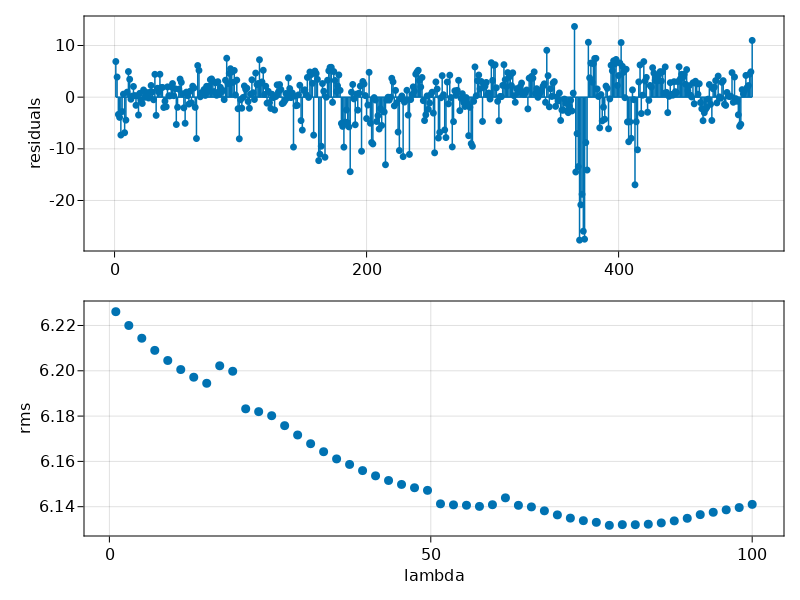

In [20]:
f = Figure()

ax1 = Axis(f[1, 1])
ax1.ylabel = "residuals"
stem!(ax1, ŷ - y)

ax2 = Axis(f[2, 1])
ax2.xlabel = "lambda"
ax2.ylabel = "rms"
scatter!(ax2, Float64.(m.report.plotting.parameter_values[:, 1]), m.report.plotting.measurements)

f